# Comparing a few visualization libraries in Python

This is just a demo notebook to show off Zenodo integration,
below are a few simple plots to show off visualizations.

Note that this repository has an `environment.yml` file in it, which
defines the environment needed to run the repository. This allows
Binder to build the environment needed so you can share the repo
with others!

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

## Generate data

First we'll generate some data to use.

In [2]:
# randn, how original
np.random.seed(1337)
x, y = np.random.randn(2, 1000)
title = "Wow what a nifty plot in {}!"

## Time to compare libraries!

We'll recreate the exact same plot (well, more or less) with each library.

### Matplotlib

First off the tried-and-true matplotlib

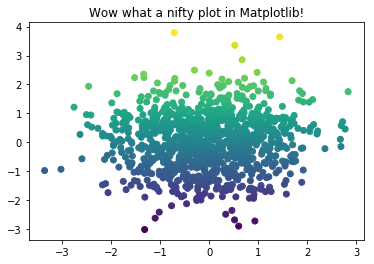

In [3]:
fig, ax = plt.subplots()
ax.scatter(x, y, c=y)
ax.set(title=title.format("Matplotlib"));

### Seaborn

Now the fancy younger sibling to Matplotlib, Seaborn. Did you
know that Seaborn is actually using Matplotlib under the hood?

/home/choldgraf/anaconda/envs/dev/lib/python3.6/site-packages/matplotlib/tight_layout.py:199: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


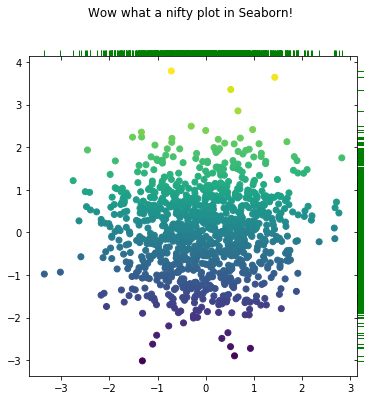

In [4]:
# Use JointGrid directly to draw a custom plot
grid = sns.JointGrid(x, y, space=0, height=6, ratio=50)
grid.plot_joint(plt.scatter, c=y)
grid.plot_marginals(sns.rugplot, height=1, color="g")
grid.fig.suptitle(title.format("Seaborn"));

### Altair

Finally, Altair is a newer and HTML-focused plotting library that
outputs responsive, web-based graphics

In [5]:
# First we'll convert to a DataFrame, Altair likes dataframes :-)
df = pd.DataFrame(np.column_stack([x, y]), columns=["x", "y"])
df.head()

,x,y
0,-0.703187,2.115284
1,-0.490282,-0.606624
2,-0.321814,-0.174180
3,-1.755079,0.953453
4,0.206664,0.348821


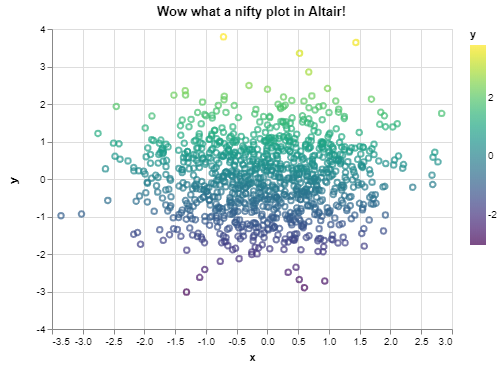

In [6]:
alt.Chart(data=df, title=title.format("Altair")).mark_point().encode(
    x='x',
    y='y',
    color=alt.Color('y', scale=alt.Scale(scheme="viridis"))
)

## And that's it!

This is a trivial little example, but maybe one that helps you imagine
what it'd be like to write a paper and publish it with Zenodo and Binder!